In [1]:
!conda activate lightning-ai-deep-learning-fundamentals
!conda install numpy pandas matplotlib --yes


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/prywantny/anaconda3

  added / updated specs:
    - matplotlib
    - numpy
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    opens

In [20]:
import pandas as pd

df = pd.read_csv("1.6.data.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [24]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [23]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [25]:
X_train.shape

(20, 2)

In [26]:
y_train.shape

(20,)

In [28]:
import numpy as np

np.bincount(y_train)

array([10, 10])

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

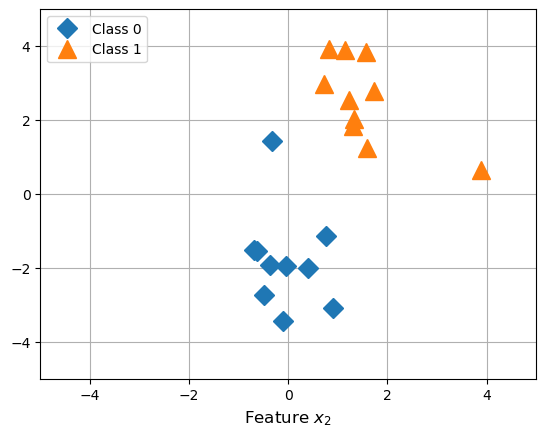

In [32]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.xlabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [42]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            return 1
        else:
            return 0

    def update(self, x, true_y):
        predication = self.forward(x)
        error = true_y - predication

        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [43]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.update(x, true_y=1)

1

In [44]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

In [46]:
model = Perceptron(num_features=2)

train(model, X_train, y_train, epochs=5)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Epoch 4 errors 0
Epoch 5 errors 0


In [47]:
model.forward([3.0, 1.0])

1

In [48]:
model.forward([0.0, 0.0])

0

In [51]:
def compute_accuracy(inner_model, all_x, all_y):
    correct = 0.0

    for x, y in zip(all_x, all_y):
        predication = inner_model.forward(x)
        correct += int(predication == y)

    return correct / len(all_y)

In [52]:
compute_accuracy(model, X_train, y_train)

1.0

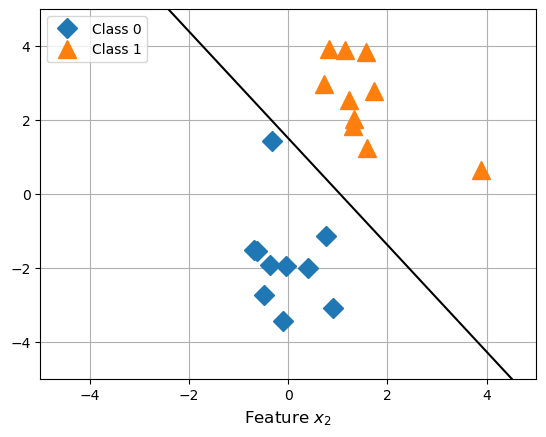

In [53]:
def plot_boundary(inner_model):
    w1, w2 = inner_model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

x1_min, x1_max, x2_min, x2_max = plot_boundary(model)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.xlabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()